In [9]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
data = pd.read_csv("G:\\GitHub\\diggi-teste\\estudo_de_caso_diggi\\dados\\base_teste_ok.csv", sep=';', encoding="utf_8")

In [5]:
data.head()

,Nº do cliente,Safra,Estado,Renda Mensal,Endividamento,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,Performance 30D3M EVER,Performance 60D6M EVER,Performance 60D9M EVER,Performance 90D9M EVER,Performance 90D12M EVER
0,6.325851e+08,2020-05-01 00:00:00 UTC,MS,1076.0,26 a 50%,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,BOM,MAU,MAU,MAU,MAU
1,1.190978e+09,2020-05-01 00:00:00 UTC,MG,12709.0,Até 25%,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,BOM,BOM,BOM,BOM,BOM
2,1.089165e+09,2020-06-01 00:00:00 UTC,MS,2518.0,Acima de 100%,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,BOM,BOM,BOM,BOM,BOM
3,1.342327e+08,2020-05-01 00:00:00 UTC,RS,1090.0,Até 25%,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,MAU,BOM,MAU,BOM,MAU
4,1.055186e+09,2020-10-01 00:00:00 UTC,RJ,1155.0,Até 25%,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,BOM,BOM,NaN,NaN,NaN


#### Definindo a regra para categorizar os dados

In [11]:
arr_cols_flag = ['30D3M','60D6M','60D9M','90D9M','90D12M']

for f in arr_cols_flag:
    col_flag = []
    for i in data['Performance ' + f + ' EVER'].iteritems():
        valor = (i[1])
        if valor == 'BOM':
            col_flag.append(1)
        elif valor == 'MAU':
            col_flag.append(0)
        else:
            col_flag.append(0)

    data[f] = col_flag

In [12]:
flag_divida = []
for i in data['Endividamento'].iteritems():
  valor = (i[1])
  if valor == 'Até 25%':
    flag_divida.append(0.25)
  elif valor == '26 a 50%':
    flag_divida.append(0.5)
  elif valor == '51 a 75%':
    flag_divida.append(0.75)
  elif valor == '76 a 100%':
    flag_divida.append(1)
  elif valor == 'Acima de 100%':
    flag_divida.append(1.5)
  else:
    flag_divida.append(None)

data['% Endividamento'] = flag_divida

In [13]:
# Se o valor da renda mensal for menor ou igual a ??? este será baixo, senão se for menor que ??? será médio, senão será alto.
categorias_renda_mensal = []
# alimentando a lista categorias
for i in data['Renda Mensal'].iteritems():
  valor = (i[1])
  if valor <= 2500:
    categorias_renda_mensal.append('Baixo')
  elif valor < 5000:
    categorias_renda_mensal.append('Medio')
  else:
    categorias_renda_mensal.append('Alto')

data['categorias_renda_mensal'] = categorias_renda_mensal

In [85]:
data.head(5)

,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento,categorias_renda_mensal
0,1076.0,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,1,0,0,0,0,0.50,Baixo
1,12709.0,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,1,1,1,1,1,0.25,Alto
2,2518.0,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,1,1,1,1,1,1.50,Medio
3,1090.0,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,0,1,0,1,0,0.25,Baixo
4,1155.0,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,1,1,0,0,0,0.25,Baixo


In [84]:
data.describe()

,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2780.155700,0.164900,0.711100,1635.66340,0.152900,209.724300,459.182800,524.183800,483.280100,695.888500,0.875600,0.829000,0.639000,0.677000,0.255800,0.445825
std,1464.592111,1.564146,1.823285,10741.23154,1.173908,2700.805532,264.013507,200.494433,215.561897,115.237171,0.330054,0.376528,0.480315,0.467646,0.436332,0.422184
min,1041.000000,0.000000,-7.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
25%,1404.000000,0.000000,0.000000,0.00000,0.000000,0.000000,216.000000,253.000000,277.000000,630.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.250000
50%,3365.000000,0.000000,0.000000,0.00000,0.000000,0.000000,481.000000,627.000000,482.000000,700.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.250000
75%,3492.000000,0.000000,1.000000,145.00000,0.000000,0.000000,672.250000,669.000000,669.000000,772.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,33564.000000,64.000000,35.000000,462266.00000,37.000000,133742.000000,999.000000,811.000000,922.000000,999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000


In [14]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
data = data[0:10000]

In [16]:
select_columns = ['Renda Mensal',
    'Quantidade de Cheques sem Fundo',
    'Quantidade de Restritivos', 'Valor dos Restritivos',
    'Quantidade de Protestos', 'Valor dos Protestos', 'Modelo Score 1',
    'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4',
    '30D3M','60D6M','60D9M','90D9M','90D12M', '% Endividamento']
data = data.filter(items=select_columns)

In [56]:
# Checando valores nulos
data.isnull().sum()

Renda Mensal                       0
Quantidade de Cheques sem Fundo    0
Quantidade de Restritivos          0
Valor dos Restritivos              0
Quantidade de Protestos            0
Valor dos Protestos                0
Modelo Score 1                     0
Modelo Score 2                     0
Modelo Score 3                     0
Modelo Score 4                     0
30D3M                              0
60D6M                              0
60D9M                              0
90D9M                              0
90D12M                             0
% Endividamento                    0
dtype: int64

In [57]:
data.head()

,Renda Mensal,Quantidade de Cheques sem Fundo,Quantidade de Restritivos,Valor dos Restritivos,Quantidade de Protestos,Valor dos Protestos,Modelo Score 1,Modelo Score 2,Modelo Score 3,Modelo Score 4,30D3M,60D6M,60D9M,90D9M,90D12M,% Endividamento
0,1076.0,0.0,2.0,418.0,0.0,0.0,141.0,236.0,196.0,405.0,1,0,0,0,0,0.50
1,12709.0,0.0,0.0,0.0,0.0,0.0,767.0,646.0,805.0,946.0,1,1,1,1,1,0.25
2,2518.0,0.0,4.0,32306.0,0.0,0.0,67.0,238.0,196.0,563.0,1,1,1,1,1,1.50
3,1090.0,0.0,0.0,0.0,0.0,0.0,245.0,523.0,290.0,698.0,0,1,0,1,0,0.25
4,1155.0,0.0,0.0,0.0,0.0,0.0,697.0,718.0,645.0,816.0,1,1,0,0,0,0.25


In [17]:
X = data.drop(columns=['30D3M','60D6M','60D9M','90D9M','90D12M'])
y = data['30D3M']

In [18]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.5, random_state=0)

tree = DecisionTreeRegressor(max_depth=None, random_state=0)
tree.fit(Xtr, ytr)

p = tree.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

0.45166359162544856

None ->  0.45166359162544856
d=2 ->  0.320921991668342
d=3 ->  0.3209063038510057
d=5 ->  0.3260887268512649
d=8 ->  0.34356142130546097
d=13 ->  0.38718338461041146

#### Plot decision trees depth node

[Text(418.5, 475.65000000000003, 'Modelo Score 2 <= 609.5\nmse = 0.108\nsamples = 5000\nvalue = 0.877'),
 Text(209.25, 339.75, 'Renda Mensal <= 1872.5\nmse = 0.161\nsamples = 2095\nvalue = 0.798'),
 Text(104.625, 203.85000000000002, 'Modelo Score 4 <= 642.5\nmse = 0.107\nsamples = 745\nvalue = 0.878'),
 Text(52.3125, 67.94999999999999, 'mse = 0.084\nsamples = 510\nvalue = 0.908'),
 Text(156.9375, 67.94999999999999, 'mse = 0.152\nsamples = 235\nvalue = 0.813'),
 Text(313.875, 203.85000000000002, 'Modelo Score 1 <= 590.5\nmse = 0.185\nsamples = 1350\nvalue = 0.754'),
 Text(261.5625, 67.94999999999999, 'mse = 0.18\nsamples = 1292\nvalue = 0.765'),
 Text(366.1875, 67.94999999999999, 'mse = 0.25\nsamples = 58\nvalue = 0.517'),
 Text(627.75, 339.75, 'Modelo Score 2 <= 653.5\nmse = 0.061\nsamples = 2905\nvalue = 0.935'),
 Text(523.125, 203.85000000000002, 'Modelo Score 3 <= 868.0\nmse = 0.098\nsamples = 1127\nvalue = 0.89'),
 Text(470.8125, 67.94999999999999, 'mse = 0.097\nsamples = 1125\nval

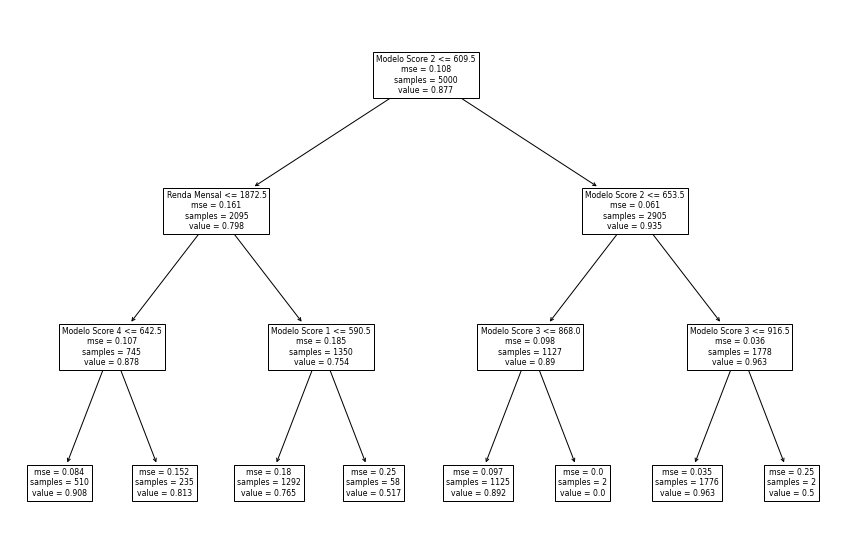

In [68]:
# Visualizando árvore de decisão
pylab.figure(figsize=(15,10))
plot_tree(tree, feature_names=Xtr.columns)

In [80]:
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.5, random_state=0)

tree = DecisionTreeRegressor(min_samples_leaf=610, random_state=0)
tree.fit(Xtr, ytr)

p = tree.predict(Xval)

np.sqrt(mean_squared_error(yval, p))

0.3205826152987339

msl=2 ->  0.4285894176118782
msl=3 ->  0.40417646036244015
msl=5 ->  0.3834886123602991
msl=8 ->  0.3633271676557688
msl=13 ->  0.35019816592317426
msl=21 ->  0.33524631154555457
msl=34 ->  0.32968624373270067
msl=55 ->  0.32500192129961963
msl=89 ->  0.3229949681725823
msl=144 -> 0.3212368842910692
msl=233 -> 0.32009993853669483
msl=377 -> 0.32009993853669483
msl=610 -> 0.3205826152987339

#### Plot decision trees MSL optimized

In [ ]:
# Visualizando árvore de decisão
pylab.figure(figsize=(15,10))
plot_tree(tree, feature_names=Xtr.columns)

#### Plot decision trees using dtreeviz Python package

In [1]:
#!pip install dtreeviz

In [19]:
from dtreeviz.trees import dtreeviz

Dtreeviz — Plot a decision tree on a regression dataset

In [20]:
data_feature_names = ['Renda Mensal',
    'Quantidade de Cheques sem Fundo',
    'Quantidade de Restritivos', 'Valor dos Restritivos',
    'Quantidade de Protestos', 'Valor dos Protestos', 'Modelo Score 1',
    'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4',
    '30D3M','60D6M','60D9M','90D9M','90D12M', '% Endividamento']
data_feature_names_crop = ['Renda Mensal',
    'Quantidade de Cheques sem Fundo',
    'Quantidade de Restritivos', 'Valor dos Restritivos',
    'Quantidade de Protestos', 'Valor dos Protestos', 'Modelo Score 1',
    'Modelo Score 2', 'Modelo Score 3', 'Modelo Score 4', '% Endividamento']
data_target_names = array(['30D3M'])

In [21]:
estimator = tree.estimators_[0]

AttributeError: 'DecisionTreeRegressor' object has no attribute 'estimators_'

In [ ]:
viz = dtreeviz(estimator, X, y,
               feature_names=house.feature_names,
               title="1st decision tree - data")

viz.save("decision_tree.svg")

In [ ]:
from google.colab import files
files.download("decision_tree.svg")